https://github.com/qiskit-community/qiskit-community-tutorials/blob/f6a222ae278257af570dcbf9408b63f428c71466/awards/teach_me_qiskit_2018/quantum_machine_learning/1_K_Means/Quantum%20K-Means%20Algorithm.ipynb

In this section, we first judge the version of Python and import the packages of qiskit, math to implement the following code. We show our algorithm on the ibm_qasm_simulator, if you need to run it on the real quantum conputer, please remove the "#" in frint of "import Qconfig".

In [1]:
# import math lib
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [2]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')

In [3]:
theta_list = [0.01, 0.02, 0.03, 0.04, 0.05, 1.31, 1.32, 1.33, 1.34, 1.35]

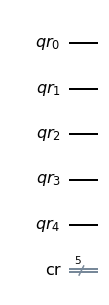

In [4]:
# create Quantum Register called "qr" with 5 qubits
qr = QuantumRegister(5, name="qr")
# create Classical Register called "cr" with 5 bits
cr = ClassicalRegister(5, name="cr")
    
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="k_means")
qc.draw(output='mpl')    


In [5]:
#Define a loop to compute the distance between each pair of points
for i in range(9):
    for j in range(1,10-i):
        # Set the parament theta about different point
        theta_1 = theta_list[i]
        theta_2 = theta_list[i+j]
        #Achieve the quantum circuit via qiskit
        qc.h(qr[2])
        qc.h(qr[1])
        qc.h(qr[4])
        qc.u(theta_1, pi, pi, qr[1])
        qc.u(theta_2, pi, pi, qr[4])
        qc.cswap(qr[2], qr[1], qr[4])
        qc.h(qr[2])
                
        qc.measure(qr[2], cr[2])
        qc.reset(qr)
            
        job = execute(qc,   backend=backend, shots=1024)
        result = job.result()   
        print(result)
        print('theta_1:' + str(theta_1))
        print('theta_2:' + str(theta_2))
        plot_histogram(result.get_counts())

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='8d1f492d-6899-4588-b249-07c1fff032d5', job_id='f1681399-eaef-497f-9f45-63bb073869b2', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1024}), header=QobjExperimentHeader(clbit_labels=[['cr', 0], ['cr', 1], ['cr', 2], ['cr', 3], ['cr', 4]], creg_sizes=[['cr', 5]], global_phase=1.3322676295501878e-15, memory_slots=5, metadata={}, n_qubits=5, name='k_means', qreg_sizes=[['qr', 5]], qubit_labels=[['qr', 0], ['qr', 1], ['qr', 2], ['qr', 3], ['qr', 4]]), status=DONE, seed_simulator=735756036, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [1, 2, 4], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 3, 'num_clbits': 5, 'sample_measure_time': 0.0002885, 'input_qubit_map': [[1, 0], [2, 1], [4, 2]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion'

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='d33ed6e2-834a-4a22-b665-a4087f1d3e5d', job_id='c4bd4c81-11fa-45f3-8ea7-d6cc0a0ddd9f', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x4': 190, '0x0': 834}), header=QobjExperimentHeader(clbit_labels=[['cr', 0], ['cr', 1], ['cr', 2], ['cr', 3], ['cr', 4]], creg_sizes=[['cr', 5]], global_phase=7.327471962526033e-15, memory_slots=5, metadata={}, n_qubits=5, name='k_means', qreg_sizes=[['qr', 5]], qubit_labels=[['qr', 0], ['qr', 1], ['qr', 2], ['qr', 3], ['qr', 4]]), status=DONE, seed_simulator=4069118085, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [1, 2, 4], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 3, 'num_clbits': 5, 'input_qubit_map': [[1, 0], [2, 1], [4, 2]], 'measure_sampling': False, 'noise': 'ideal', 'parallel_shots': 8, 'parallel_state_update': 1, 'fusion': {'enabled': True, 't

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='e4610f49-7e85-4181-aef3-0d98a7528bbc', job_id='f9f2036b-8ede-4218-9f46-311d425dc8c2', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 839, '0x4': 185}), header=QobjExperimentHeader(clbit_labels=[['cr', 0], ['cr', 1], ['cr', 2], ['cr', 3], ['cr', 4]], creg_sizes=[['cr', 5]], global_phase=1.3322676295501878e-14, memory_slots=5, metadata={}, n_qubits=5, name='k_means', qreg_sizes=[['qr', 5]], qubit_labels=[['qr', 0], ['qr', 1], ['qr', 2], ['qr', 3], ['qr', 4]]), status=DONE, seed_simulator=1908989680, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [1, 2, 4], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 3, 'num_clbits': 5, 'input_qubit_map': [[1, 0], [2, 1], [4, 2]], 'measure_sampling': False, 'noise': 'ideal', 'parallel_shots': 8, 'parallel_state_update': 1, 'fusion': {'enabled': True, '

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='1acc92d2-717a-4c79-9baf-c9b5c82b0f5b', job_id='c99876e1-42bd-4075-83d4-7a8511761206', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1024}), header=QobjExperimentHeader(clbit_labels=[['cr', 0], ['cr', 1], ['cr', 2], ['cr', 3], ['cr', 4]], creg_sizes=[['cr', 5]], global_phase=1.865174681370263e-14, memory_slots=5, metadata={}, n_qubits=5, name='k_means', qreg_sizes=[['qr', 5]], qubit_labels=[['qr', 0], ['qr', 1], ['qr', 2], ['qr', 3], ['qr', 4]]), status=DONE, seed_simulator=2669112496, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [1, 2, 4], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 3, 'num_clbits': 5, 'input_qubit_map': [[1, 0], [2, 1], [4, 2]], 'measure_sampling': False, 'noise': 'ideal', 'parallel_shots': 8, 'parallel_state_update': 1, 'fusion': {'enabled': True, 'threshold': 

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='d47b452a-b2b9-419a-b264-4a23e13bb38f', job_id='06c421ad-b384-4bf2-ad47-1b55d4856c1a', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1024}), header=QobjExperimentHeader(clbit_labels=[['cr', 0], ['cr', 1], ['cr', 2], ['cr', 3], ['cr', 4]], creg_sizes=[['cr', 5]], global_phase=2.3314683517128287e-14, memory_slots=5, metadata={}, n_qubits=5, name='k_means', qreg_sizes=[['qr', 5]], qubit_labels=[['qr', 0], ['qr', 1], ['qr', 2], ['qr', 3], ['qr', 4]]), status=DONE, seed_simulator=3163345659, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [1, 2, 4], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 3, 'num_clbits': 5, 'input_qubit_map': [[1, 0], [2, 1], [4, 2]], 'measure_sampling': False, 'noise': 'ideal', 'parallel_shots': 8, 'parallel_state_update': 1, 'fusion': {'enabled': True, 'threshold':

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='da2dc31f-8761-4167-aa24-50fab9f4181d', job_id='4ac2e657-9f20-40fb-8623-fe1ec4e32e42', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 855, '0x4': 169}), header=QobjExperimentHeader(clbit_labels=[['cr', 0], ['cr', 1], ['cr', 2], ['cr', 3], ['cr', 4]], creg_sizes=[['cr', 5]], global_phase=2.731148640577885e-14, memory_slots=5, metadata={}, n_qubits=5, name='k_means', qreg_sizes=[['qr', 5]], qubit_labels=[['qr', 0], ['qr', 1], ['qr', 2], ['qr', 3], ['qr', 4]]), status=DONE, seed_simulator=73997414, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [1, 2, 4], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 3, 'num_clbits': 5, 'input_qubit_map': [[1, 0], [2, 1], [4, 2]], 'measure_sampling': False, 'noise': 'ideal', 'parallel_shots': 8, 'parallel_state_update': 1, 'fusion': {'enabled': True, 'thr

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='c3b04238-8c5c-4eab-b140-860a3b2a7d2d', job_id='2306b3f2-4500-47c8-98db-2f0a3c7e161c', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1024}), header=QobjExperimentHeader(clbit_labels=[['cr', 0], ['cr', 1], ['cr', 2], ['cr', 3], ['cr', 4]], creg_sizes=[['cr', 5]], global_phase=2.9976021664879227e-14, memory_slots=5, metadata={}, n_qubits=5, name='k_means', qreg_sizes=[['qr', 5]], qubit_labels=[['qr', 0], ['qr', 1], ['qr', 2], ['qr', 3], ['qr', 4]]), status=DONE, seed_simulator=2445648764, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [1, 2, 4], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 3, 'num_clbits': 5, 'input_qubit_map': [[1, 0], [2, 1], [4, 2]], 'measure_sampling': False, 'noise': 'ideal', 'parallel_shots': 8, 'parallel_state_update': 1, 'fusion': {'enabled': True, 'threshold':

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='a69cada4-3e00-437b-914c-34a26cf1729e', job_id='4fad8e3c-ce31-4610-8e4f-0ab863598349', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1024}), header=QobjExperimentHeader(clbit_labels=[['cr', 0], ['cr', 1], ['cr', 2], ['cr', 3], ['cr', 4]], creg_sizes=[['cr', 5]], global_phase=2.9976021664879227e-14, memory_slots=5, metadata={}, n_qubits=5, name='k_means', qreg_sizes=[['qr', 5]], qubit_labels=[['qr', 0], ['qr', 1], ['qr', 2], ['qr', 3], ['qr', 4]]), status=DONE, seed_simulator=1430959363, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [1, 2, 4], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 3, 'num_clbits': 5, 'input_qubit_map': [[1, 0], [2, 1], [4, 2]], 'measure_sampling': False, 'noise': 'ideal', 'parallel_shots': 8, 'parallel_state_update': 1, 'fusion': {'enabled': True, 'threshold':